In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import set_config
set_config(print_changed_only=False)

# Kickstarter Project #

* Kickstarter adalah sebuah perusahaan fintech yang bergerak pada bidang reward crowdfunding. Kickstarter memberi kesempatan kepada banyak orang untuk memulai proyek yang ingin mereka bangun tetapi terhambat masalah dana. Pendana atau yang dipanggil Backers umumnya akan mendapatkan sebuah reward berupa early access, produk gratis, ataupun reward lainnya.

# Problem

* Karena Kickstarter sudah mulai dikenal banyak orang, membuat sangat banyak orang yang ingin proyek mereka akan terdanai sama dengan proyek-proyek yang telah launching berkat kickstarter. Sayangnya, tidak semua terdanai sesuai harapan, yang dikhawatirkan adalah persentase proyek yang berhasil akan terus tergerus oleh proyek yang tidak.

# Goal

* Pada kesempatan kali ini saya akan mencoba untuk menganlisa sebuah data tentang proyek-proyek yang terdaftar di situs Kickstarter. Menganaalisa dan mencari tahu apa yang bisa dilakukan untuk menambah persentase keberhasilan dan juga membuat sebuah model prediksi apakah proyek yang akan dipublikasikan akan terdanai atau tidak.

In [4]:
df=pd.read_csv('Clean_KS.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87542 entries, 0 to 87541
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   87534 non-null  object 
 1   category               87542 non-null  object 
 2   main_category          87542 non-null  object 
 3   pledged                87542 non-null  object 
 4   usd pledged            87305 non-null  object 
 5   desc                   87510 non-null  object 
 6   goal                   87542 non-null  float64
 7   disable_communication  87542 non-null  bool   
 8   country                87542 non-null  object 
 9   currency               87542 non-null  object 
 10  deadline               87542 non-null  object 
 11  state_changed_at       87542 non-null  object 
 12  created_at             87542 non-null  object 
 13  launched_at            87542 non-null  object 
 14  backers_count          87542 non-null  int64  
 15  fi

In [6]:
df.columns

Index(['name', 'category ', 'main_category ', 'pledged ', 'usd pledged ',
       'desc', 'goal', 'disable_communication', 'country', 'currency',
       'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'backers_count', 'final_status', 'Create_Launched', 'Launched_Changed',
       'Launched_Deadline', 'Changed_Deadline', 'year', 'goal_usd', 'Month'],
      dtype='object')

In [7]:
df.columns=df.columns.str.replace('\s+','')
df.columns=df.columns.str.replace('&','_') 
df.columns=df.columns.str.replace('-','_') 

In [8]:
df_describe =[]

for i in df.columns:
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [9]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique'])
DESC

,column,type,nan,nan%,nunique,unique
0,name,object,8,0.01,85378,"[Where is Hank?, Of Jesus and Madmen, The Bear..."
1,category,object,0,0.00,162,"[Narrative Film, Nonfiction, Comic Books, Art ..."
2,main_category,object,0,0.00,18,"[Film & Video, Publishing, Comics, Food, Art, ..."
3,pledged,object,0,0.00,28056,"[220, 0, 395, 789, 48, 48905, 21, 1395, 8641.3..."
4,usdpledged,object,237,0.27,37970,"[220, 0, 395, 789, 6.18000816, 43203.2511447, ..."
5,desc,object,32,0.04,85030,"[Abandoned Property. Sounds of struggle, muffl..."
6,goal,float64,0,0.00,3000,"[45000.0, 2500.0, 1500.0, 3000.0, 500.0, 17757..."
7,disable_communication,bool,0,0.00,2,"[False, True]"
8,country,object,0,0.00,11,"[US, CA, NO, GB, AU, NZ, SE, NL, DK, IE, DE]"
9,currency,object,0,0.00,9,"[USD, CAD, NOK, GBP, AUD, NZD, SEK, EUR, DKK]"


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,87542.0,17809.873411,51620.053849,1.000000,2000.0,5000.0,15000.0,3000000.0
backers_count,87542.0,98.513114,317.190014,0.000000,2.0,15.0,66.0,4974.0
final_status,87542.0,0.307372,0.461408,0.000000,0.0,0.0,1.0,1.0
Create_Launched,87542.0,38.783898,77.968074,0.000000,4.0,12.0,36.0,747.0
Launched_Changed,87542.0,31.606566,11.737889,0.000000,30.0,30.0,33.0,61.0
Launched_Deadline,87542.0,32.619645,10.941118,1.000000,30.0,30.0,34.0,60.0
Changed_Deadline,87542.0,1.014747,4.982938,0.000000,0.0,0.0,0.0,50.0
year,87542.0,2013.614596,1.008355,2012.000000,2013.0,2014.0,2014.0,2015.0
goal_usd,87542.0,17046.642866,41193.564532,0.729927,2000.0,5000.0,15000.0,500000.0
Month,87542.0,6.028603,3.368603,1.000000,3.0,6.0,9.0,12.0


In [11]:
df.describe(include='O')

,name,category,main_category,pledged,usdpledged,desc,country,currency,deadline,state_changed_at,created_at,launched_at
count,87534,87542,87542,87542,87305,87510,87542,87542,87542,87542,87542,87542
unique,85378,162,18,28056,37970,85030,11,9,1233,1233,1455,1240
top,New EP/Music Development,Video Games,Film & Video,0,0,Breakout Artist Management has offered to work...,US,USD,2014-08-08,2014-08-08,2014-07-08,2014-07-09
freq,287,4485,14775,8067,8025,267,71760,71760,397,372,827,512


In [12]:
df.shape

(87542, 23)

# Explore Data Analysis

### Target 

In [13]:
df['final_status'].value_counts()

0    60634
1    26908
Name: final_status, dtype: int64

<AxesSubplot:>

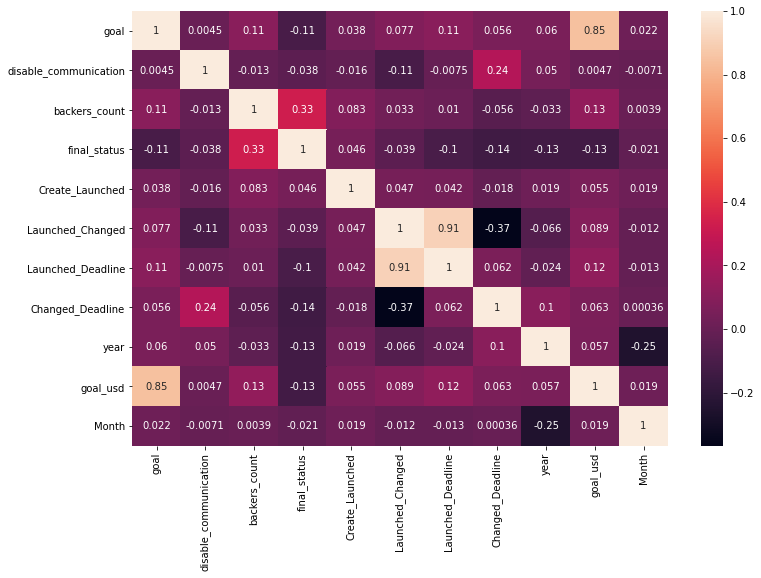

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

## Name and Desc 

In [15]:
df.dtypes

name                      object
category                  object
main_category             object
pledged                   object
usdpledged                object
desc                      object
goal                     float64
disable_communication       bool
country                   object
currency                  object
deadline                  object
state_changed_at          object
created_at                object
launched_at               object
backers_count              int64
final_status               int64
Create_Launched            int64
Launched_Changed           int64
Launched_Deadline          int64
Changed_Deadline           int64
year                       int64
goal_usd                 float64
Month                      int64
dtype: object

In [16]:
df['name']=df['name'].astype('str')
df['desc']=df['desc'].astype('str')

In [17]:

namecount=[]
for i in df['name']:
    k=len(i.split())
    namecount.append(k)

desccount=[]
for i in df['desc']:
    k=len(i.split())
    desccount.append(k)

df['name_count']=namecount
df['desc_count']=desccount

df

,name,category,main_category,pledged,usdpledged,desc,goal,disable_communication,country,currency,...,final_status,Create_Launched,Launched_Changed,Launched_Deadline,Changed_Deadline,year,goal_usd,Month,name_count,desc_count
0,Where is Hank?,Narrative Film,Film & Video,220,220,"Abandoned Property. Sounds of struggle, muffle...",45000.0,False,US,USD,...,0,3,45,45,0,2013,45000.000000,1,3,15
1,Of Jesus and Madmen,Nonfiction,Publishing,0,0,This is an autobiography of my personal experi...,2500.0,False,CA,CAD,...,0,7,30,30,0,2013,1923.076923,9,4,21
2,The Beard,Comic Books,Comics,395,395,'The beard' is a comedy based comic about an a...,1500.0,False,US,USD,...,0,8,30,30,0,2014,1500.000000,10,2,27
3,Notes From London: Above & Below,Art Books,Publishing,789,789,Notes From London: Above & Below is an unusual...,3000.0,False,US,USD,...,0,2,30,30,0,2015,3000.000000,4,6,21
4,Mountain brew: A quest for alcohol sustainability,Drinks,Food,48,6.18000816,This is the start of an exiting venture of bre...,500.0,False,NO,NOK,...,0,3,30,30,0,2015,55.432373,1,7,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87537,Google Glass Shield (Canceled),3D Printing,Technology,0,0,Once you go Glass you never go back. Now you c...,6500.0,False,US,USD,...,0,9,1,21,20,2014,6500.000000,5,4,27
87538,The Dog Coffee Book,Children's Books,Publishing,1732.02,1732.02,The first book in a series of children's books...,950.0,False,US,USD,...,1,2,43,43,0,2013,950.000000,10,4,17
87539,The Cease is Increase,Nonfiction,Publishing,980,980,An Oral History of the Milwaukee Underground M...,4999.0,False,US,USD,...,0,64,30,30,0,2012,4999.000000,8,4,23
87540,AT THE BEACH,Classical Music,Music,5501,5019.92,Recording a second CD with original piano musi...,5000.0,False,CA,CAD,...,1,23,29,29,0,2014,3846.153846,2,3,18


In [18]:
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize 

from nltk.corpus import stopwords

In [19]:
stop=set(stopwords.words('english'))

In [20]:
dfsuc=df[df['final_status']== 1 ]

dffail=df[df['final_status']== 0]

In [21]:
dfsuc['desc'] = dfsuc['desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

dffail['desc'] = dffail['desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

dfsuc['name'] = dfsuc['name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

dffail['name'] = dffail['name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
N = 200

df1 =  (dfsuc.set_index('final_status')['desc']
          .str.lower()
          .str.split(expand=True)
          .stack()
          .groupby(level=0)
          .value_counts()
          .groupby(level=0)
          .head(N)
          .rename_axis(('status','words'))
          .reset_index(name='count'))

df2 =  (dffail.set_index('final_status')['desc']
          .str.lower()
          .str.split(expand=True)
          .stack()
          .groupby(level=0)
          .value_counts()
          .groupby(level=0)
          .head(N)
          .rename_axis(('status','words'))
          .reset_index(name='count'))

df3 =  (dfsuc.set_index('final_status')['name']
          .str.lower()
          .str.split(expand=True)
          .stack()
          .groupby(level=0)
          .value_counts()
          .groupby(level=0)
          .head(N)
          .rename_axis(('status','words'))
          .reset_index(name='count'))

df4 =  (dffail.set_index('final_status')['name']
          .str.lower()
          .str.split(expand=True)
          .stack()
          .groupby(level=0)
          .value_counts()
          .groupby(level=0)
          .head(N)
          .rename_axis(('status','words'))
          .reset_index(name='count'))

In [23]:
df1['length'] = df1.words.str.len()

df1 = df1[df1['length'] > 3]

df2['length'] = df2.words.str.len()

df2 = df2[df2['length'] > 3]

df3['length'] = df3.words.str.len()

df3 = df3[df3['length'] > 3]

df4['length'] = df4.words.str.len()

df4 = df4[df4['length'] > 3]

### Succes and fail Desc

In [24]:
import wordcloud

from wordcloud import WordCloud

In [25]:
df1=df1.head(10)
df1

,status,words,count,length
2,1,help,2975,4
6,1,first,1587,5
8,1,film,1340,4
9,1,game,1290,4
10,1,make,1246,4
12,1,album,1137,5
13,1,need,1104,4
14,1,book,1091,4
18,1,music,1015,5
19,1,this,986,4


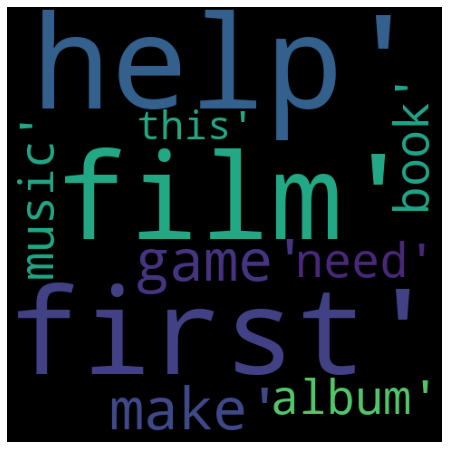

<Figure size 432x288 with 0 Axes>

In [26]:
text = df1['words'].values
amenities = WordCloud(width=480, height=480, max_words=50, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(12,8))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

In [27]:
df2=df2.head(10)
df2

,status,words,count,length
3,0,help,5741,4
7,0,make,3086,4
8,0,need,2955,4
9,0,this,2812,4
10,0,book,2780,4
11,0,want,2774,4
12,0,first,2753,5
13,0,music,2647,5
15,0,game,2323,4
16,0,project,2311,7


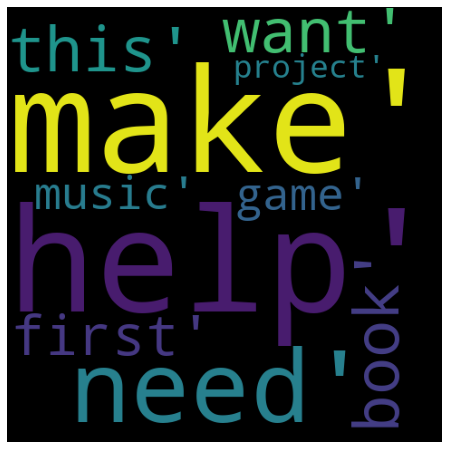

<Figure size 432x288 with 0 Axes>

In [28]:
text = df2['words'].values
amenities = WordCloud(width=480, height=480, max_words=50, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(12,8))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

### Succes and fail Name 

In [29]:
df3=df3.head(10) 
df3

,status,words,count,length
5,1,album,1166,5
6,1,film,938,4
7,1,project,750,7
8,1,game,703,4
9,1,book,611,4
10,1,debut,596,5
11,1,first,557,5
13,1,short,538,5
14,1,help,460,4
15,1,music,422,5


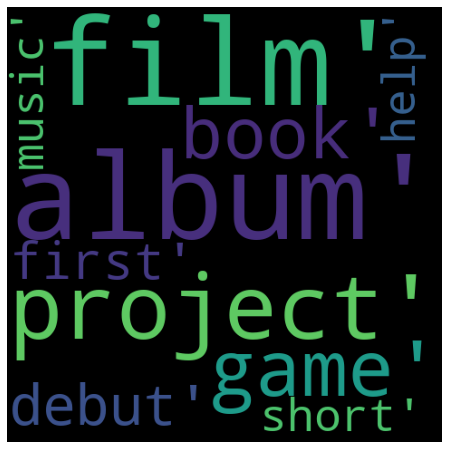

<Figure size 432x288 with 0 Axes>

In [30]:
text = df3['words'].values
amenities = WordCloud(width=480, height=480, max_words=50, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(12,8))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

In [31]:
df4=df4.head(10)
df4

,status,words,count,length
3,0,(canceled),3665,10
6,0,project,1826,7
7,0,album,1628,5
9,0,book,1298,4
10,0,music,1162,5
11,0,film,1123,4
12,0,help,1026,4
13,0,game,980,4
14,0,first,941,5
16,0,series,811,6


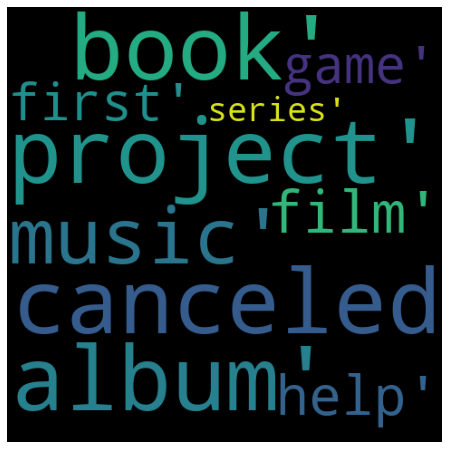

<Figure size 432x288 with 0 Axes>

In [32]:
text = df4['words'].values
amenities = WordCloud(width=480, height=480, max_words=50, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(12,8))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

* Word count without word in Main category

* Desc Success : First, Help, Make , Need, This.

* Desc Fail : Make, Help, Need, This, Want, First.

* Name Success: Short, Debut, first, Help, Project.

* Name fail : Canceled, First, Help, Project.

* 'Help' word Not helping you to being backed
* 'First' word should be in description instead of name.
* Name with word 'Debut' in it makes it more intresting than 'first'.
* There's project canceled, considered as a fail project.
* 'Short' word is used many times in successful projects name.
* 'Make', 'Need', and 'This' made no difference.

### Average count of words in name and desc columns

In [33]:
dfsuc['name_count'].mean()

5.7462464694514646

In [34]:
dfsuc['desc_count'].mean()

19.25256429314702

In [35]:
dffail['name_count'].mean()

5.263564996536597

In [36]:
dffail['desc_count'].mean()

19.333756638189794

* count of in name and description made no significant difference

## Category & Main Category

### category

In [37]:
df['category'].value_counts()

Video Games                   4485
Nonfiction                    3804
Fiction                       3493
Shorts                        3037
Rock                          2959
                              ... 
 Help Refine a Book              1
 Bleed For Us.                   1
 The Weapon of Choice            1
 Detroit : Into The Future       1
 Forgotten Futures               1
Name: category, Length: 162, dtype: int64

#### succes

In [38]:
df5 =  (dfsuc.set_index('final_status')['category']
          .str.lower()
          .str.split(expand=True)
          .stack()
          .groupby(level=0)
          .value_counts()
          .groupby(level=0)
          .head(N)
          .rename_axis(('status','words'))
          .reset_index(name='count'))

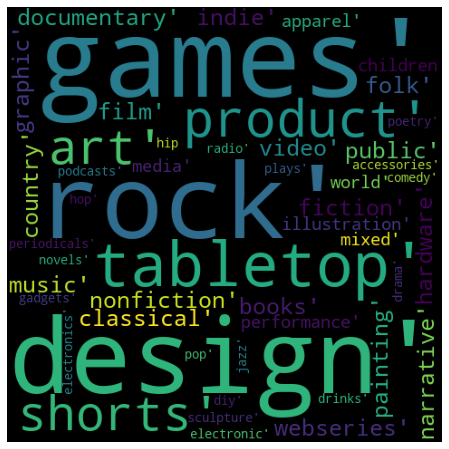

<Figure size 432x288 with 0 Axes>

In [39]:
text = df5['words'].values
amenities = WordCloud(width=480, height=480, max_words=50, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(12,8))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

In [40]:
df5.head()

,status,words,count
0,1,games,3267
1,1,design,2386
2,1,rock,2323
3,1,tabletop,2198
4,1,product,1984


* There's top 5 of Category on successed project data

#### fail

In [41]:
df6 =  (dffail.set_index('final_status')['category']
          .str.lower()
          .str.split(expand=True)
          .stack()
          .groupby(level=0)
          .value_counts()
          .groupby(level=0)
          .head(N)
          .rename_axis(('status','words'))
          .reset_index(name='count'))

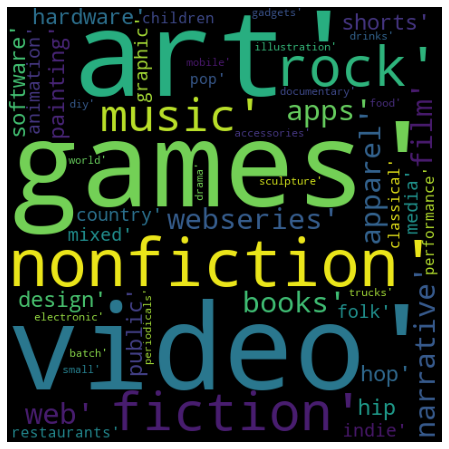

<Figure size 432x288 with 0 Axes>

In [42]:
text = df6['words'].values
amenities = WordCloud(width=480, height=480, max_words=50, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(12,8))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

In [43]:
df6.head()

,status,words,count
0,0,games,4520
1,0,video,3741
2,0,art,3250
3,0,nonfiction,2913
4,0,rock,2768


* and there's top 5 of category on failed project.

### Main Category 

In [44]:
df['main_category'].value_counts()

Film & Video       14775
Music              13728
Publishing         12310
Technology          9028
Art                 8587
Games               8465
Food                5227
Design              3890
Fashion             3880
Photography         1930
Crafts              1540
Theater             1430
Comics              1300
Journalism          1088
Dance                361
Fiction                1
Performance Art        1
Digital Art            1
Name: main_category, dtype: int64

In [45]:
df=df[df['main_category']!='Performance Art']
df=df[df['main_category']!='Fiction']
df=df[df['main_category']!='Digital Art']

In [46]:
pd.crosstab(index=df['main_category'], columns=df['final_status'])

final_status,0,1
main_category,,
Art,5973,2614
Comics,758,542
Crafts,1249,291
Dance,270,91
Design,1445,2445
Fashion,3185,695
Film & Video,9495,5280
Food,4530,697
Games,5069,3396


In [47]:
df['final_status'].value_counts()

0    60632
1    26907
Name: final_status, dtype: int64

* final status counts is like 3 for succes :7 for fail.
* i guessing if i multiple success category by 2,3 (just like the fail count) i will find out which main category is worth to try.    

In [48]:
df10=pd.crosstab(index=df['main_category'], columns=df['final_status'])

In [49]:
df10=pd.merge(df10[0], df10[1]*2.3, on='main_category')

In [50]:
df10

,0,1
main_category,,
Art,5973,6012.2
Comics,758,1246.6
Crafts,1249,669.3
Dance,270,209.3
Design,1445,5623.5
Fashion,3185,1598.5
Film & Video,9495,12144.0
Food,4530,1603.1
Games,5069,7810.8


In [51]:
dfsuc=dfsuc[dfsuc['main_category']!='Performance Art']
dfsuc=dfsuc[dfsuc['main_category']!='Fiction']
dfsuc=dfsuc[dfsuc['main_category']!='Digital Art']

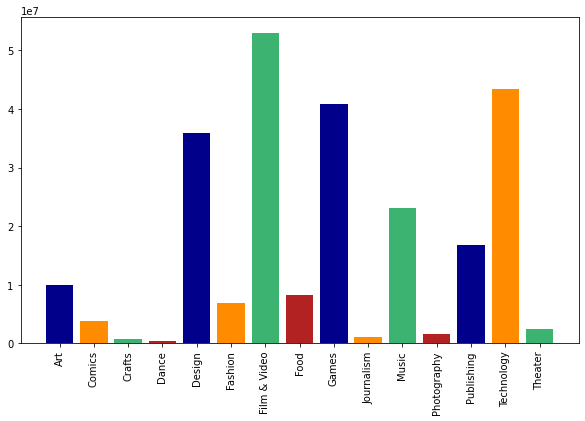

In [52]:
keys = [pair for pair, dfsuc in dfsuc.groupby(['main_category'])]
plt.figure(figsize=(10,6))
plt.bar(keys, dfsuc.groupby(['main_category']).sum()['goal_usd'],color=['darkblue', 'darkorange', 'mediumseagreen', 'firebrick'])
plt.xticks(keys,rotation=90)
plt.show()

In [53]:
dffail=dffail[dffail['main_category']!='Performance Art']
dffail=dffail[dffail['main_category']!='Fiction']
dffail=dffail[dffail['main_category']!='Digital Art']

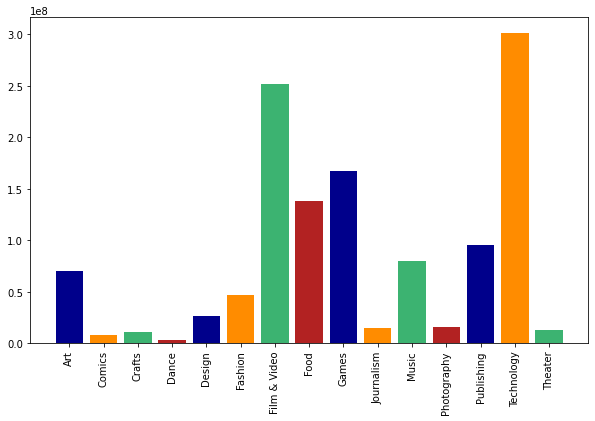

In [54]:
keys = [pair for pair, dffail in dffail.groupby(['main_category'])]
plt.figure(figsize=(10,6))
plt.bar(keys, dffail.groupby(['main_category']).sum()['goal_usd'],color=['darkblue', 'darkorange', 'mediumseagreen', 'firebrick'])
plt.xticks(keys,rotation=90)
plt.show()

* Comics, Design, Film & video, Games, Music are worth to try
* Art & Dance  will give 50:50 chance by category
* Crafts, Fashion, Food, Journalism, Photography, Publishing, Technology, Theater are not that worth to try.

# Goal 

In [55]:
df

,name,category,main_category,pledged,usdpledged,desc,goal,disable_communication,country,currency,...,final_status,Create_Launched,Launched_Changed,Launched_Deadline,Changed_Deadline,year,goal_usd,Month,name_count,desc_count
0,Where is Hank?,Narrative Film,Film & Video,220,220,"Abandoned Property. Sounds of struggle, muffle...",45000.0,False,US,USD,...,0,3,45,45,0,2013,45000.000000,1,3,15
1,Of Jesus and Madmen,Nonfiction,Publishing,0,0,This is an autobiography of my personal experi...,2500.0,False,CA,CAD,...,0,7,30,30,0,2013,1923.076923,9,4,21
2,The Beard,Comic Books,Comics,395,395,'The beard' is a comedy based comic about an a...,1500.0,False,US,USD,...,0,8,30,30,0,2014,1500.000000,10,2,27
3,Notes From London: Above & Below,Art Books,Publishing,789,789,Notes From London: Above & Below is an unusual...,3000.0,False,US,USD,...,0,2,30,30,0,2015,3000.000000,4,6,21
4,Mountain brew: A quest for alcohol sustainability,Drinks,Food,48,6.18000816,This is the start of an exiting venture of bre...,500.0,False,NO,NOK,...,0,3,30,30,0,2015,55.432373,1,7,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87537,Google Glass Shield (Canceled),3D Printing,Technology,0,0,Once you go Glass you never go back. Now you c...,6500.0,False,US,USD,...,0,9,1,21,20,2014,6500.000000,5,4,27
87538,The Dog Coffee Book,Children's Books,Publishing,1732.02,1732.02,The first book in a series of children's books...,950.0,False,US,USD,...,1,2,43,43,0,2013,950.000000,10,4,17
87539,The Cease is Increase,Nonfiction,Publishing,980,980,An Oral History of the Milwaukee Underground M...,4999.0,False,US,USD,...,0,64,30,30,0,2012,4999.000000,8,4,23
87540,AT THE BEACH,Classical Music,Music,5501,5019.92,Recording a second CD with original piano musi...,5000.0,False,CA,CAD,...,1,23,29,29,0,2014,3846.153846,2,3,18


### Goal x Final status 

<AxesSubplot:xlabel='final_status', ylabel='goal'>

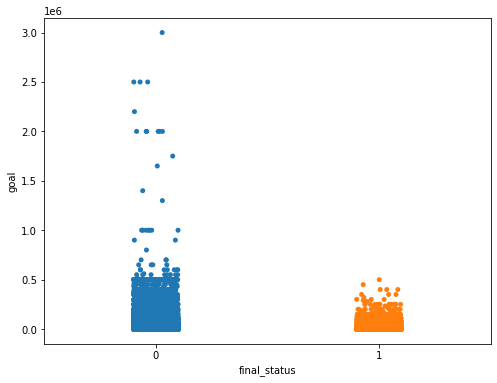

In [56]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'final_status', y = 'goal', data = df)

<AxesSubplot:xlabel='final_status', ylabel='goal_usd'>

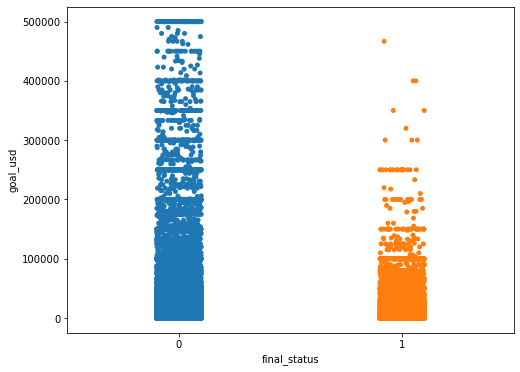

In [57]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'final_status', y = 'goal_usd', data = df)

* more high your goal amount is makes your project more harder to be successfull, but, its not close your chance. It's likely to failure after your goal is higher than 75.000 Dollars USD. So be more wisely.

### goal_usd x time

#### year

<AxesSubplot:xlabel='year', ylabel='goal_usd'>

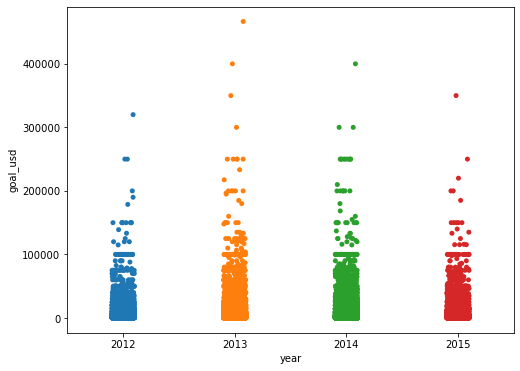

In [58]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'year', y = 'goal_usd', data = dfsuc)

In [59]:
dfsuc['year'].value_counts()

2014    9574
2013    7211
2012    6185
2015    3937
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='goal_usd'>

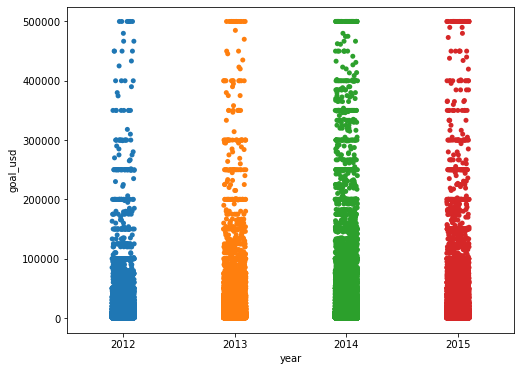

In [60]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'year', y = 'goal_usd', data = dffail)

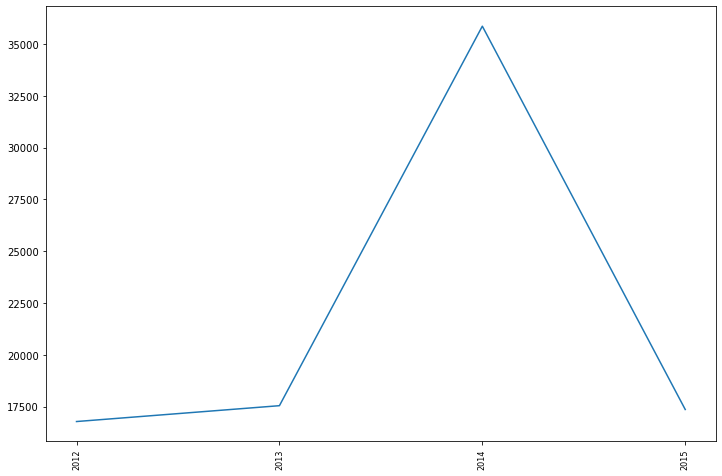

In [61]:
keys = [pair for pair, df in df.groupby(['year'])]
plt.figure(figsize=(12,8))
plt.plot(keys, df.groupby(['year']).count()['goal_usd'])
plt.xticks(keys,rotation=90,size=8)
plt.show()

In [62]:
dffail['year'].value_counts()

2014    26288
2015    13421
2012    10592
2013    10331
Name: year, dtype: int64

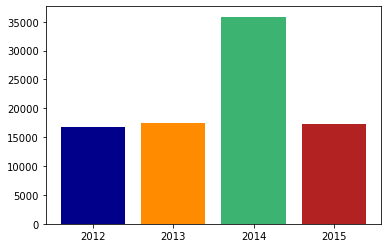

In [63]:
keys = [pair for pair, df in df.groupby(['year'])]

plt.bar(keys, df.groupby(['year']).count()['goal'],color=['darkblue', 'darkorange', 'mediumseagreen', 'firebrick'])
plt.xticks(keys)
plt.show()

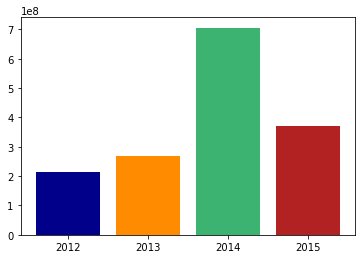

In [64]:
keys = [pair for pair, df in df.groupby(['year'])]

plt.bar(keys, df.groupby(['year']).sum()['goal'],color=['darkblue', 'darkorange', 'mediumseagreen', 'firebrick'])
plt.xticks(keys)
plt.show()

* On March, 2013, Kickstarter just got some record, there's project witch getting funded after only 12 hours. Maybe its makes some trend Kickstarter starting increases?
* [Crazy Funded](https://www.wired.com/2013/03/veronica-mars-kickstarter-record/)

* Meanwhile in 2014 unfortunately Kickstarter was hacked, User data was just stolen, could that make the Kickstarter trend crash?
*[Kickstarter Hacked](https://www.cnet.com/news/kickstarter-hacked-user-data-stolen/)

* If it's true, then you need to consider about a news that happening on Kickstarter. Bad news makes backers won't come!

#### Month

In [65]:
pd.crosstab(index=df['Month'], columns=df['final_status'])

final_status,0,1
Month,,
1,5349,2382
2,5894,2795
3,6651,3111
4,6096,2900
5,4049,2153
6,3898,2014
7,6718,2226
8,5072,1936
9,4382,1981


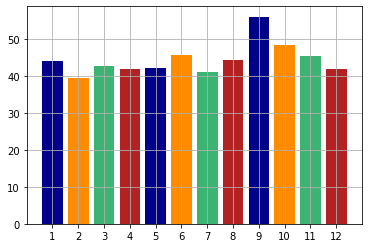

In [66]:
keys = [pair for pair, dfsuc in dfsuc.groupby(['Month'])]

plt.bar(keys, dfsuc.groupby(['Month']).mean()['Create_Launched'],color=['darkblue', 'darkorange', 'mediumseagreen', 'firebrick'])
plt.xticks(keys)
plt.grid()
plt.show()

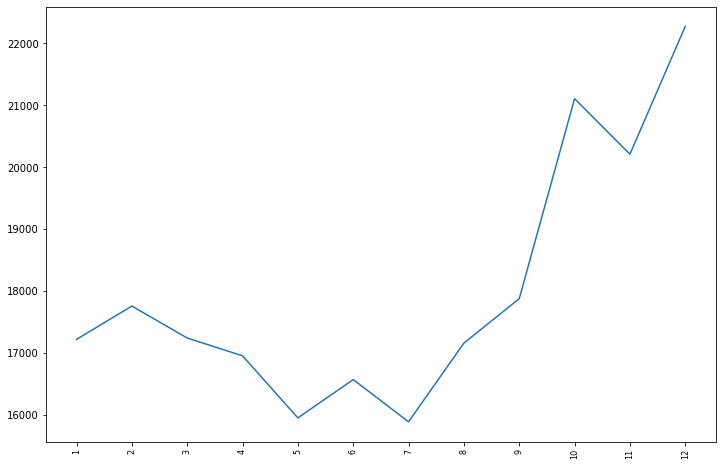

In [67]:
keys = [pair for pair, df in df.groupby(['Month'])]
plt.figure(figsize=(12,8))
plt.plot(keys, df.groupby(['Month']).mean()['goal'])
plt.xticks(keys,rotation=90,size=8)
plt.show()

* As I thought, most businesses I know always having bad trend on May-July, try to consider about that! posting your project after  or before that month would probably be great!

### Goal x other time

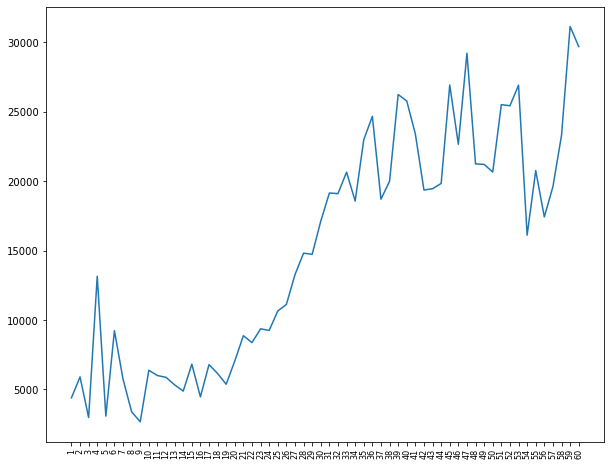

In [68]:
keys = [pair for pair, df in df.groupby(['Launched_Deadline'])]
plt.figure(figsize=(10,8))
plt.plot(keys, df.groupby(['Launched_Deadline']).mean()['goal'])
plt.xticks(keys,rotation=90,size=8)
plt.show()

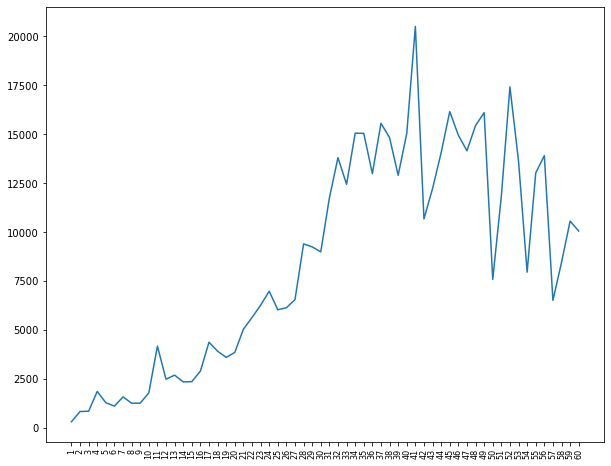

In [69]:
keys = [pair for pair, dfsuc in dfsuc.groupby(['Launched_Deadline'])]
plt.figure(figsize=(10,8))
plt.plot(keys, dfsuc.groupby(['Launched_Deadline']).mean()['goal'])
plt.xticks(keys,rotation=90,size=8)
plt.show()

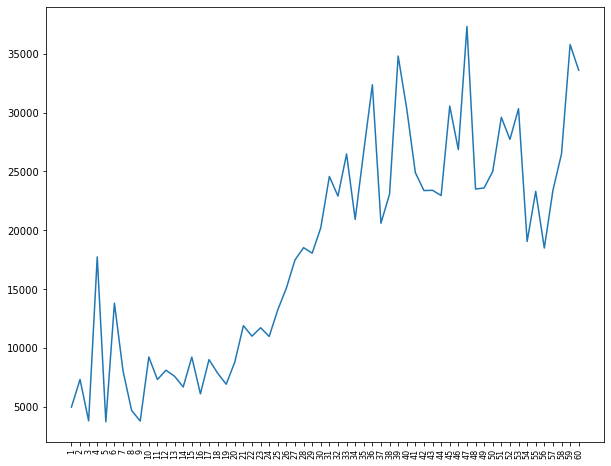

In [70]:
keys = [pair for pair, dffail in dffail.groupby(['Launched_Deadline'])]
plt.figure(figsize=(10,8))
plt.plot(keys, dffail.groupby(['Launched_Deadline']).mean()['goal'])
plt.xticks(keys,rotation=90,size=8)
plt.show()

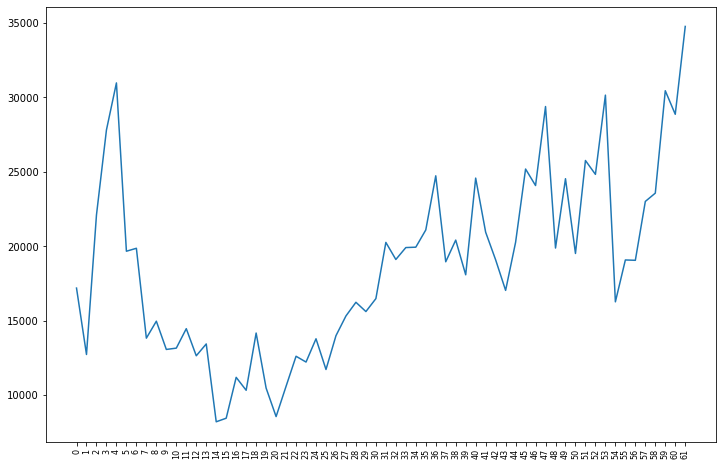

In [71]:
keys = [pair for pair, df in df.groupby(['Launched_Changed'])]
plt.figure(figsize=(12,8))
plt.plot(keys, df.groupby(['Launched_Changed']).mean()['goal'])
plt.xticks(keys,rotation=90,size=8)
plt.show()

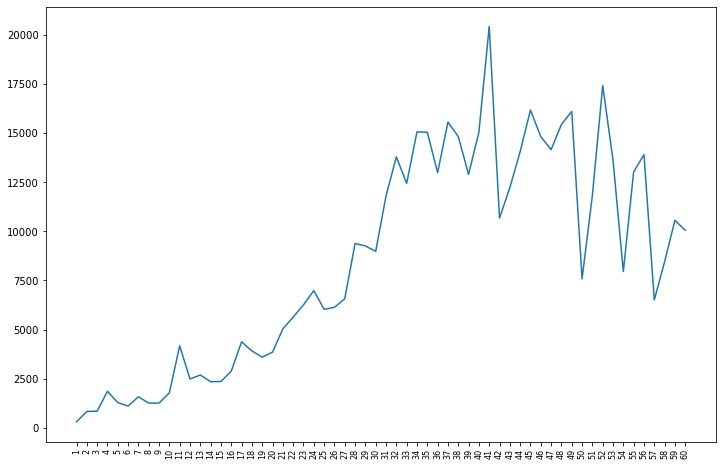

In [72]:
keys = [pair for pair, dfsuc in dfsuc.groupby(['Launched_Changed'])]
plt.figure(figsize=(12,8))
plt.plot(keys, dfsuc.groupby(['Launched_Changed']).mean()['goal'])
plt.xticks(keys,rotation=90,size=8)
plt.show()

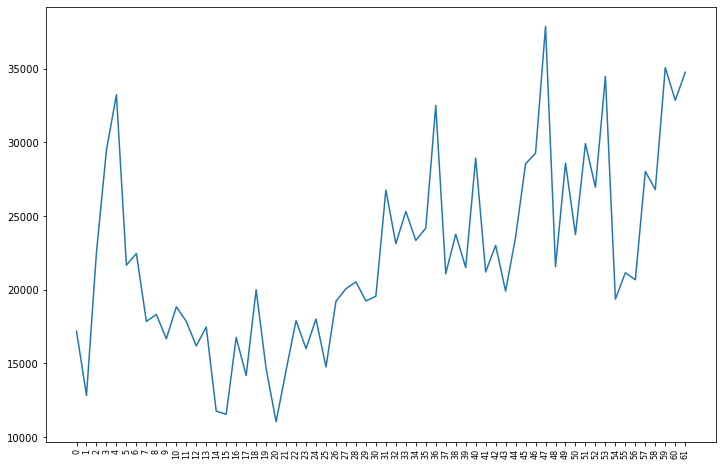

In [73]:
keys = [pair for pair, dffail in dffail.groupby(['Launched_Changed'])]
plt.figure(figsize=(12,8))
plt.plot(keys, dffail.groupby(['Launched_Changed']).mean()['goal'])
plt.xticks(keys,rotation=90,size=8)
plt.show()

In [74]:
df.columns

Index(['name', 'category', 'main_category', 'pledged', 'usdpledged', 'desc',
       'goal', 'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status', 'Create_Launched', 'Launched_Changed',
       'Launched_Deadline', 'Changed_Deadline', 'year', 'goal_usd', 'Month',
       'name_count', 'desc_count'],
      dtype='object')

* Set your deadline more than 25 days, it we increase your project to be successfull

### Currency, Country

#### country

In [75]:
df['country'].value_counts()

US    71757
GB     8624
CA     3673
AU     1815
NL      689
NZ      343
SE      238
DK      189
NO      106
IE      104
DE        1
Name: country, dtype: int64

In [76]:
pd.crosstab(index=df['country'], columns=df['final_status'])

final_status,0,1
country,,
AU,1485,330
CA,2864,809
DE,1,0
DK,147,42
GB,6140,2484
IE,81,23
NL,602,87
NO,90,16
NZ,266,77


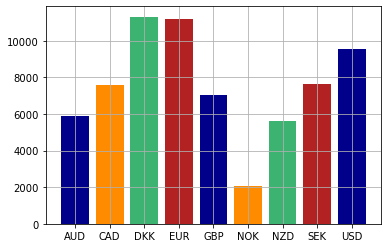

In [77]:
keys = [pair for pair, dfsuc in dfsuc.groupby(['currency'])]

plt.bar(keys, dfsuc.groupby(['currency']).mean()['goal_usd'],color=['darkblue', 'darkorange', 'mediumseagreen', 'firebrick'])
plt.xticks(keys)
plt.grid()
plt.show()

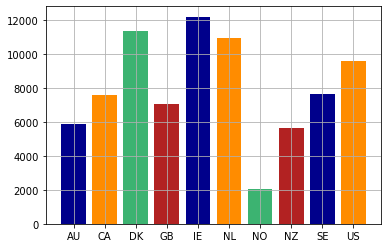

In [78]:
keys = [pair for pair, dfsuc in dfsuc.groupby(['country'])]

plt.bar(keys, dfsuc.groupby(['country']).mean()['goal_usd'],color=['darkblue', 'darkorange', 'mediumseagreen', 'firebrick'])
plt.xticks(keys)
plt.grid()
plt.show()

* There's average successful project with their amount of goal based on currency and country. You can considering about the goal of your project based on your currency and country.

#### Currency 

In [79]:
df['currency'].value_counts()

USD    71757
GBP     8624
CAD     3673
AUD     1815
EUR      794
NZD      343
SEK      238
DKK      189
NOK      106
Name: currency, dtype: int64

In [80]:
pd.crosstab(index=df['currency'], columns=df['final_status'])

final_status,0,1
currency,,
AUD,1485,330
CAD,2864,809
DKK,147,42
EUR,684,110
GBP,6140,2484
NOK,90,16
NZD,266,77
SEK,194,44
USD,48762,22995


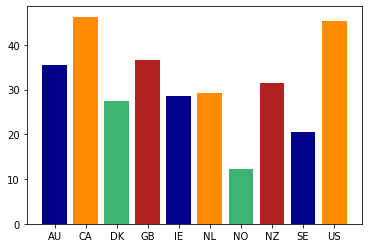

In [81]:
keys = [pair for pair, dfsuc in dfsuc.groupby(['country'])]

plt.bar(keys, dfsuc.groupby(['country']).mean()['Create_Launched'],color=['darkblue', 'darkorange', 'mediumseagreen', 'firebrick'])
plt.xticks(keys)
plt.show()

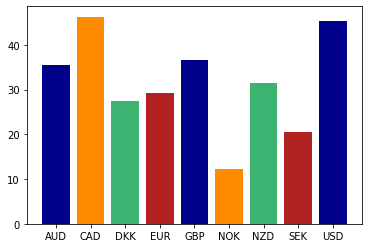

In [82]:
keys = [pair for pair, dfsuc in dfsuc.groupby(['currency'])]

plt.bar(keys, dfsuc.groupby(['currency']).mean()['Create_Launched'],color=['darkblue', 'darkorange', 'mediumseagreen', 'firebrick'])
plt.xticks(keys)
plt.show()

* there is data on average successful projects with waiting times for their projects to be published. You can better know how long it will take you to consider your project until it is published. be patient!

# Communication

In [83]:
df['disable_communication'].value_counts()

False    87256
True       283
Name: disable_communication, dtype: int64

In [84]:
df=df.drop(columns='disable_communication')

* I just drop it, just dont turn off your Communication!

## Other

In [85]:
df.columns

Index(['name', 'category', 'main_category', 'pledged', 'usdpledged', 'desc',
       'goal', 'country', 'currency', 'deadline', 'state_changed_at',
       'created_at', 'launched_at', 'backers_count', 'final_status',
       'Create_Launched', 'Launched_Changed', 'Launched_Deadline',
       'Changed_Deadline', 'year', 'goal_usd', 'Month', 'name_count',
       'desc_count'],
      dtype='object')

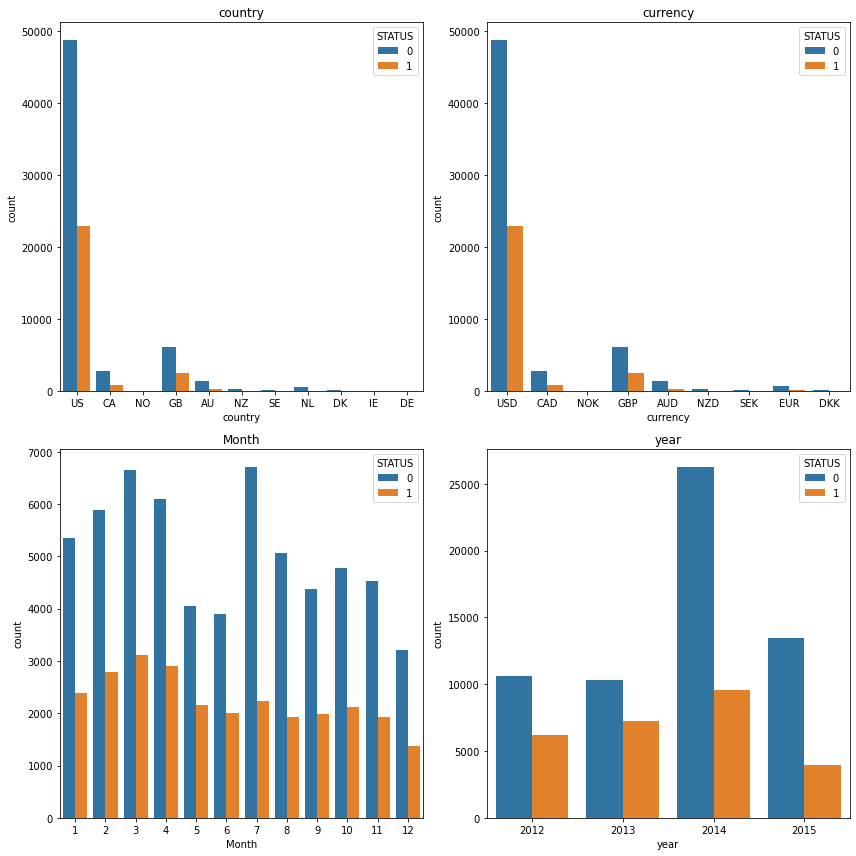

In [86]:
cols=['country','currency','Month','year']
n_rows=2
n_cols=2

fix,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6, n_rows*6))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(df[cols[i]],hue=df['final_status'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='STATUS',loc='upper right')

plt.tight_layout()

In [88]:
df.to_csv("Clean_KS_after_EDA.csv", index=False)